# Molecular Classification of Cancer by Gene Expression Monitoring

Gene expression dataset (Golub et al.,1999)

Context
This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

There are two datasets containing the initial (training, 38 samples) and independent (test, 34 samples) datasets used in the paper. These datasets contain measurements corresponding to ALL and AML samples from Bone Marrow and Peripheral Blood. Intensity values have been re-scaled such that overall intensities for each chip are equivalent.

These datasets have been converted to a comma separated value files (CSV).
Each row represents a different gene
Columns 1 and 2 are descriptions about that gene
Each numbered column is a patient
Each patient has 7129 gene expression values - i.e each patient has one value for each gene
The training data contain gene expression values for patients 1 through 38
The test data contain gene expression values for patients 39 through 72



In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to avoid warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading the datasets. 
#Here there are three datasets involved.The initial (training, 38 samples), independent (test, 34 samples) dataset and 
# the actual label dataset, labeling the total 72 patients as either ALL or AML.

labels = pd.read_csv(r'data/ALL_AML_actual.csv', index_col = 'patient')
test = pd.read_csv(r'data/ALL_AML_independent.csv')
train = pd.read_csv(r'data/ALL_AML_train.csv')


In [3]:
train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [4]:
test.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [5]:
labels.head()

,cancer
patient,
1,ALL
2,ALL
3,ALL
4,ALL
5,ALL


# Data Cleaning and preprocessing

In [6]:
#In the train and test datasets, there is an additional column called Call, which may be referring to the probe used 
#during DNA microaaray analysis for measuring gene expression. Since it is not necessary for modeling, the columns are dropped.

cols = [col for col in test.columns if 'call' in col]
test = test.drop(cols, 1)

cols = [col for col in train.columns if 'call' in col]
train = train.drop(cols, 1)



In [7]:
test.head()

,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,...,54,57,58,60,61,65,66,63,64,62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,276,182,266,24,142,252,...,319,178,340,31,396,141,95,146,431,9
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


In [8]:
train.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [9]:
# Here, gene expression data is listed as rows and each patient(sample) are listed as columns. 
# Transposing the dataframe so that each row is a patient and each column corresponds to the expression level of a gene.

train = train.T
test = test.T
train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [10]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42


In [11]:
# Clean up the column names for training data-Removing Gene Description and 
# Translating index types from strings to respective numeric type values for sorting. 
train.columns = train.iloc[1]
train = train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)


test.columns = test.iloc[1]
test = test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)


In [12]:

train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [13]:
train.columns

Index(['AFFX-BioB-5_at', 'AFFX-BioB-M_at', 'AFFX-BioB-3_at', 'AFFX-BioC-5_at',
       'AFFX-BioC-3_at', 'AFFX-BioDn-5_at', 'AFFX-BioDn-3_at',
       'AFFX-CreX-5_at', 'AFFX-CreX-3_at', 'AFFX-BioB-5_st',
       ...
       'U48730_at', 'U58516_at', 'U73738_at', 'X06956_at', 'X16699_at',
       'X83863_at', 'Z17240_at', 'L49218_f_at', 'M71243_f_at', 'Z78285_f_at'],
      dtype='object', name='Gene Accession Number', length=7129)

In [14]:
test.columns

Index(['AFFX-BioB-5_at', 'AFFX-BioB-M_at', 'AFFX-BioB-3_at', 'AFFX-BioC-5_at',
       'AFFX-BioC-3_at', 'AFFX-BioDn-5_at', 'AFFX-BioDn-3_at',
       'AFFX-CreX-5_at', 'AFFX-CreX-3_at', 'AFFX-BioB-5_st',
       ...
       'U48730_at', 'U58516_at', 'U73738_at', 'X06956_at', 'X16699_at',
       'X83863_at', 'Z17240_at', 'L49218_f_at', 'M71243_f_at', 'Z78285_f_at'],
      dtype='object', name='Gene Accession Number', length=7129)

In [15]:
train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [16]:
#Removing the columns with endogenous controls, which are not necessary
import re
end_cont_train = [col for col in train if not re.match("^AFFX", col)]
end_cont_test = [col for col in test if not re.match("^AFFX", col)]

train_dataset = train[end_cont_train]
test_dataset = test[end_cont_test]

In [17]:
train_dataset.head()

Gene Accession Number,hum_alu_at,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,15091,151,72,281,36,-299,57,186,1647,137,...,185,511,-125,389,-37,793,329,36,191,-37
2,11038,263,21,250,43,-103,169,219,2043,188,...,169,837,-36,442,-17,782,295,11,76,-14
3,16692,88,-27,358,42,142,359,237,1997,91,...,315,1199,33,168,52,1138,777,41,228,-41
4,15763,484,61,118,39,-11,274,245,2128,-82,...,240,835,218,174,-110,627,170,-50,126,-91
5,18128,118,16,197,39,237,311,186,1608,204,...,156,649,57,504,-26,250,314,14,56,-25


In [18]:
train_dataset.shape

(38, 7071)

In [19]:
test_dataset.shape

(34, 7071)

In [23]:
# Importing labels (for the whole dataset, both training and testing)
labels = pd.read_csv(r'data/ALL_AML_actual.csv',index_col = 'patient')

labels.sort_index(inplace = True)

labels = labels.replace({'ALL':0,'AML':1})

labels.index = pd.to_numeric(labels.index)


In [24]:
train_dataset.isna().sum()

Gene Accession Number
hum_alu_at     0
A28102_at      0
AB000114_at    0
AB000115_at    0
AB000220_at    0
              ..
X83863_at      0
Z17240_at      0
L49218_f_at    0
M71243_f_at    0
Z78285_f_at    0
Length: 7071, dtype: int64

In [25]:
test_dataset.isna().sum()

Gene Accession Number
hum_alu_at     0
A28102_at      0
AB000114_at    0
AB000115_at    0
AB000220_at    0
              ..
X83863_at      0
Z17240_at      0
L49218_f_at    0
M71243_f_at    0
Z78285_f_at    0
Length: 7071, dtype: int64

# Concatenating the test and train dataframes including labels

In [26]:
# In order to combine two dataframes, their indices need to be the same.

#Train_dataset

train_dataset = train_dataset.reset_index(drop=True)

# Subset the first 38 patient's cancer types
labels_train = labels[labels.index <= 38]

labels_train = labels_train.reset_index(drop=True)

# Combine dataframes for first 38 patients: Patient number + cancer type + gene expression values
train = pd.concat([labels_train,train_dataset], axis=1)


In [27]:
#Test_dataset

test_dataset = test_dataset.reset_index(drop=True)

# Subset the last patient's cancer types to test
labels_test = labels[labels.index > 38]

labels_test = labels_test.reset_index(drop=True)

# Combine dataframes for last patients: Patient number + cancer type + gene expression values
test = pd.concat([labels_test,test_dataset], axis=1)

In [28]:
train.head()

,cancer,hum_alu_at,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,0,15091,151,72,281,36,-299,57,186,1647,...,185,511,-125,389,-37,793,329,36,191,-37
1,0,11038,263,21,250,43,-103,169,219,2043,...,169,837,-36,442,-17,782,295,11,76,-14
2,0,16692,88,-27,358,42,142,359,237,1997,...,315,1199,33,168,52,1138,777,41,228,-41
3,0,15763,484,61,118,39,-11,274,245,2128,...,240,835,218,174,-110,627,170,-50,126,-91
4,0,18128,118,16,197,39,237,311,186,1608,...,156,649,57,504,-26,250,314,14,56,-25


In [29]:
train.tail()

,cancer,hum_alu_at,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
33,1,26052,318,1,103,-61,39,181,47,976,...,173,492,54,277,-13,279,51,6,2484,-2
34,1,11983,382,1,239,72,377,96,173,1767,...,225,737,63,472,33,737,227,-9,371,-31
35,1,23508,486,-23,221,39,-14,120,285,1939,...,36,592,57,215,-22,588,361,-26,133,-32
36,1,17996,388,56,405,192,-31,36,113,1462,...,348,938,-15,433,-2,1170,284,39,298,-3
37,1,19679,260,-27,1306,32,-349,255,115,2818,...,209,634,-58,375,-23,2315,250,-12,790,-10


In [30]:
test.head()

,cancer,hum_alu_at,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,0,45815,241,-38,251,98,-260,149,275,2573,...,277,1023,67,214,-135,1074,475,48,168,-70
1,0,20958,430,4,131,68,181,70,406,1963,...,83,529,-295,352,-67,67,263,-33,-33,-21
2,0,25880,96,31,138,40,-120,283,113,1082,...,413,399,16,558,24,893,297,6,1971,-42
3,0,41275,65,-212,1147,35,-77,285,172,1548,...,174,277,6,81,2,722,170,0,510,-73
4,0,11195,260,28,128,46,0,833,390,2222,...,233,643,51,450,-46,612,370,29,333,-19


In [31]:
test.tail(10)

,cancer,hum_alu_at,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
24,1,31068,120,3,252,68,341,180,210,1783,...,118,244,14,462,-104,618,308,0,196,20
25,1,38690,163,64,131,29,-53,64,82,1481,...,133,430,31,261,-58,507,64,-11,198,-33
26,1,58203,1106,185,859,68,-98,46,98,1947,...,318,408,-275,352,18,1372,642,-9,608,-71
27,1,31022,402,82,191,11,-42,201,90,1502,...,157,334,-130,242,-53,87,98,-26,153,-49
28,0,36915,145,49,65,47,-268,69,136,2316,...,342,970,-106,240,-86,1111,459,-8,73,-41
29,0,22818,316,0,105,104,-76,38,261,1397,...,92,532,-34,239,-78,707,354,-22,260,5
30,0,39323,228,36,106,113,19,141,165,1030,...,63,297,36,358,2,423,41,0,1777,-49
31,0,15689,395,73,334,73,417,259,359,2656,...,130,639,-27,548,-39,809,445,-2,210,16
32,0,41570,311,-56,235,46,845,168,517,3570,...,84,1141,-121,197,-108,466,349,0,284,-73
33,0,39538,373,-23,377,-34,403,85,152,1844,...,81,574,132,618,-9,551,194,20,379,-60


In [32]:
test.shape, train.shape

((34, 7072), (38, 7072))

# Exploratory Data Analysis

Prevalence of ALL and AML among the 72 patients:
Note that 0 corresponds to ALL and 1 corresponds to AML
We can see that ALL is more common than AML.

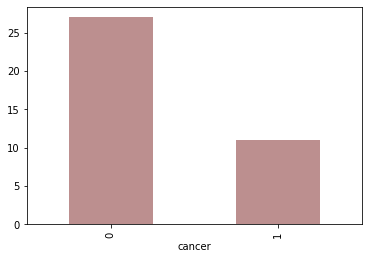

In [33]:
outcomes = train.groupby('cancer').size()
outcomes.plot(kind = 'bar',color='rosybrown')

Genes with the highest expression levels in both the cancer types are plotted.

Text(0, 0.5, 'Expression Levels')

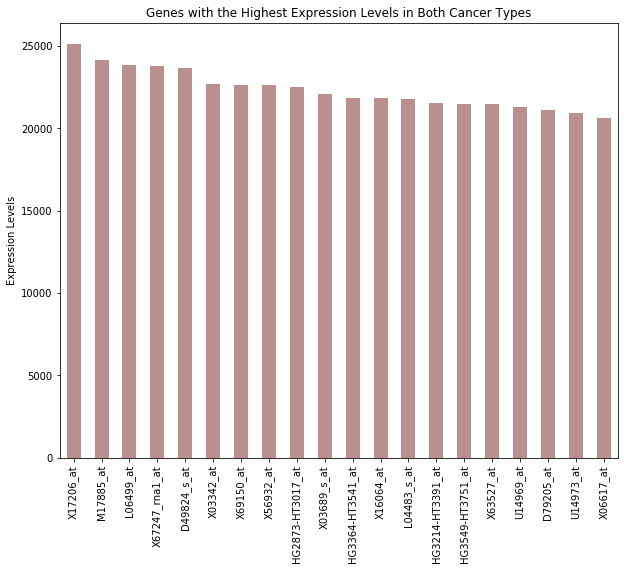

In [34]:
most_exp = train.mean().abs().sort_values(ascending = False)
plt.figure(figsize=(10, 8))
most_exp.head(20).plot(kind = 'bar',color='rosybrown')
plt.title('Genes with the Highest Expression Levels in Both Cancer Types')
plt.ylabel('Expression Levels')

Genes with the lowest expression levels in both the cancer types are plotted.

Text(0, 0.5, 'Expression Levels')

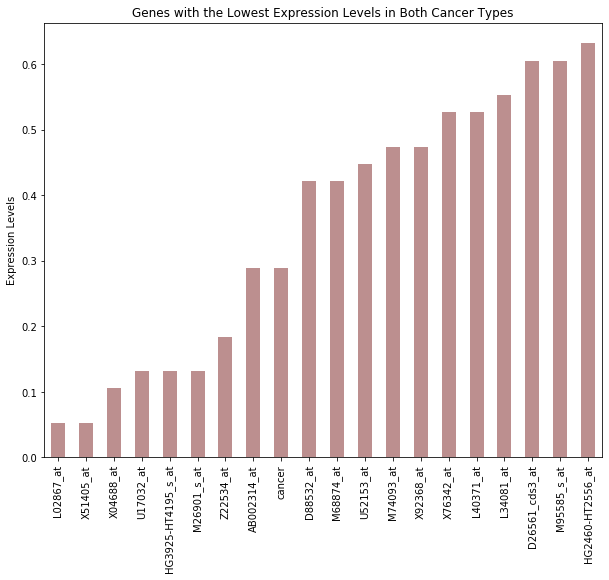

In [35]:
least_exp = train.mean().abs().sort_values(ascending = True)
plt.figure(figsize=(10, 8))
least_exp.head(20).plot(kind = 'bar',color='rosybrown')
plt.title('Genes with the Lowest Expression Levels in Both Cancer Types')
plt.ylabel('Expression Levels')

# Using the train dataset to set X and Y variables

In [36]:

X= train.drop('cancer',axis=1)

y = train['cancer']


Since there are 7072 features, it is beneficial to go with dimensionality reduction. Hence, we opt for PCA.
Initially, we don't set the number of desired components.

# Dimensionality Reduction with PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(38, 38)


In [38]:
#In order to find the optimum number of components
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.99:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " features explain around 99% of the variance. From 7072, the number of features were reduced to ", k, sep='')


35 features explain around 99% of the variance. From 7072, the number of features were reduced to 35


(38, 35)


<BarContainer object of 35 artists>

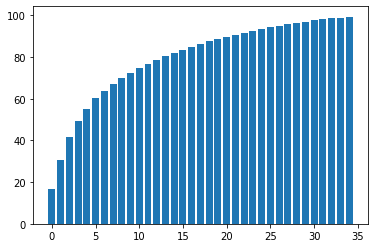

In [39]:
pca = PCA(n_components=k, random_state=42)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp)

# Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.33, random_state = 0)

# Model Building

# Unsupervised Model- K means clustering

In [41]:
# Instance creation and Fit_Predict 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10, random_state=0).fit(X_train)
y_kmeans = kmeans.predict(X_test)


In [42]:
y_kmeans

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1])

K-means accuracy: 76.92307692307693


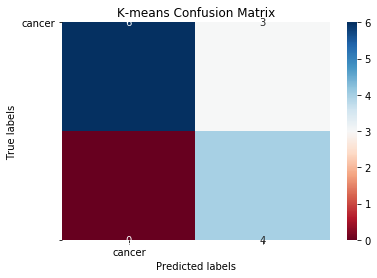

In [43]:
#Calculating accuracy score and visualizing confusion matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


ac_km=accuracy_score(y_test, y_kmeans)*100
print('K-means accuracy:', ac_km)

cm_km = confusion_matrix(y_test, y_kmeans)


ax = plt.subplot()
sns.heatmap(cm_km, annot=True, ax = ax, fmt='g', cmap='RdBu') 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('K-means Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

# K-nearest neighbour Classifier

In [44]:
# Instance creation  
from sklearn.neighbors import KNeighborsClassifier
n_classifier=KNeighborsClassifier(n_neighbors=3)

In [45]:
# Fit_Predict
n_classifier.fit(X_train,y_train)
y_pred_knn=n_classifier.predict(X_test)

KNN Accuracy: 100.0


[Text(0, 0.5, 'cancer')]

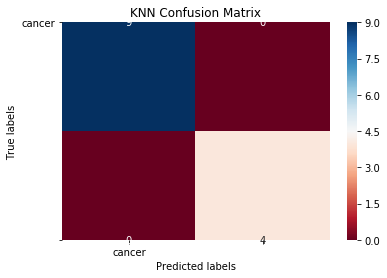

In [46]:
#Calculating accuracy score and visualizing confusion matrix

ac_knn=accuracy_score(y_test,y_pred_knn)*100
print("KNN Accuracy:",ac_knn)

cm_knn=confusion_matrix(y_test,y_pred_knn)
ax = plt.subplot()
sns.heatmap(cm_knn, annot=True, ax = ax, fmt='g', cmap='RdBu') 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('KNN Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# Naive-Bayes Classifier

In [47]:
from sklearn.naive_bayes import GaussianNB

#Instantiating Naive Bayes object
nb_model= GaussianNB()

#Fitting and Predicting
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)


Naive Bayes Accuracy: 69.23076923076923


[Text(0, 0.5, 'cancer')]

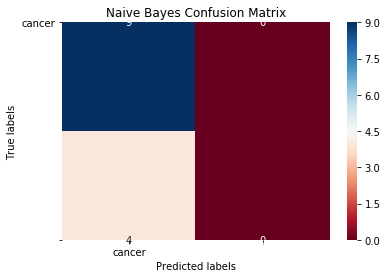

In [48]:
#Calculating accuracy score and visualizing confusion matrix
ac_nb=accuracy_score(y_test,y_pred_nb)*100
print("Naive Bayes Accuracy:",ac_nb)

cm_nb=confusion_matrix(y_test,y_pred_nb)
ax = plt.subplot()
sns.heatmap(cm_nb, annot=True, ax = ax, fmt='g', cmap='RdBu') 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Naive Bayes Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# Random Forest Classifier with GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Instantiate random forest classifier
rf_estimator = RandomForestClassifier(random_state=0)

# Hyperparameters search grid 
rf_param_grid = {'bootstrap': [False, True],
         'n_estimators': [60, 70, 80, 90, 100],
         'max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
         'min_samples_leaf': [8, 10, 12, 14],
         'min_samples_split': [3, 5, 7]
        }

# Create the GridSearchCV object
rf_model = GridSearchCV(estimator=rf_estimator, param_grid=rf_param_grid, cv=10, scoring='accuracy')

# Fine-tune the hyperparameters
rf_model.fit(X_train, y_train)

#Get the best parameters
print("Best Parameters:\n", rf_model.best_params_)



Best Parameters:
 {'bootstrap': False, 'max_features': 0.6, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 60}


In [50]:
rf_estimator=RandomForestClassifier(bootstrap= False, max_features= 0.6, 
                                    min_samples_leaf= 8, min_samples_split= 3, n_estimators= 60)
# Fit the  best parameters
rf_estimator.fit(X_train, y_train)

# Make predictions using the optimised parameters
y_pred_rf = rf_estimator.predict(X_test)




Accuracy Random Forest Classifier: 76.92307692307693


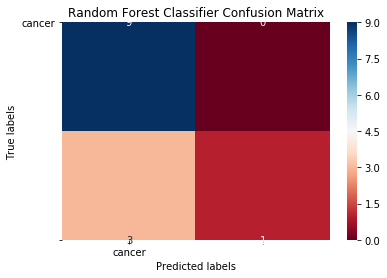

In [51]:
#Calculating accuracy score and visualizing the confusion matrix

ac_rf = accuracy_score(y_test, y_pred_rf)*100
cm_rf= confusion_matrix(y_test, y_pred_rf)

print("Accuracy Random Forest Classifier:",ac_rf)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='RdBu') 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Classifier Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);


# Support Vector Classifier with GridSearchCV

In [52]:

from sklearn.svm import SVC # "Support vector classifier"

# Instantiate Support vector classifier
svclassifier=SVC()

#Hyperparameter tuning using GridSearchCV
svm_parameters = {'C':[0.001,0.1,1,5,10,100], 'gamma':[0.1,0.01, 1,10],'kernel':['rbf','linear']},
   

svm_model = GridSearchCV(estimator=SVC(), 
                               param_grid=svm_parameters, 
                               scoring=None,
                               n_jobs=-1, 
                               cv=10, 
                               verbose=1,
                               return_train_score=True)

svm_model.fit(X_train, y_train)

print("Best score with GridSearchCV:", svm_model.best_score_)

#Getting Best Parameters of SVM
print(svm_model.best_params_, "\n")

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s


Best score with GridSearchCV: 1.0
{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'} 



[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    3.0s finished


In [53]:
# Fit the  best parameters
svclassifier=SVC(C=0.001,gamma=0.1,kernel= 'linear')
svclassifier.fit(X_train,y_train)

# Make predictions using the optimised parameters
y_pred_SVM = svclassifier.predict(X_test)

Accuracy SVM: 92.3076923076923


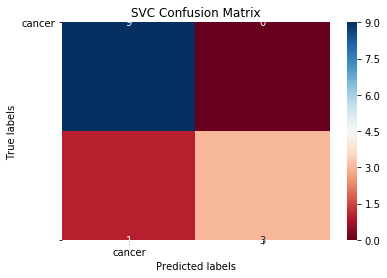

In [54]:
#Calculating accuracy score and visualizing the confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score

ac_svm = accuracy_score(y_test, y_pred_SVM)*100
cm_svm= confusion_matrix(y_test, y_pred_SVM)


print("Accuracy SVM:",ac_svm)
ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax, fmt='g', cmap='RdBu') 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVC Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

# XGBoost with GridSearchCV

In [55]:
import xgboost as xgb

# Instantiate XGB classifier
xgb_cls = xgb.XGBClassifier()

#Hyperparameter tuning using GridSearchCV
xgb_parameters={'max_depth': [3, 4, 5, 6, 7, 8, 10, 12],
               'min_child_weight': [1, 2, 4, 6, 8, 10, 12, 15],
               'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120, 130],
               'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]} 
                
xgb_model = GridSearchCV(xgb.XGBClassifier(), 
                       param_grid = xgb_parameters, 
                       scoring = 'accuracy',
                       cv = 10)

xgb_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
          

In [56]:
# Get the best parameters
xgb_model.best_params_


{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 90}

In [57]:
# Make predictions using the optimised parameters

xgb_cls = xgb.XGBClassifier(learning_rate= 0.05,max_depth= 3,min_child_weight= 1,n_estimators= 90)
xgb_cls.fit(X_train,y_train)
y_pred_xgb = xgb_cls.predict(X_test)


Accuracy XGB: 84.61538461538461


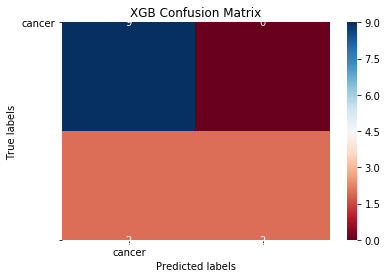

In [58]:
#Calculating accuracy score and visualizing the confusion matrix
ac_xgb = accuracy_score(y_test, y_pred_xgb)*100
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Accuracy XGB:",ac_xgb)

ax = plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax = ax, fmt='g', cmap='RdBu') 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('XGB Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

# Logistic Regression with GridSearchCV

In [59]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regressor

log_estimator = LogisticRegression()

#Hyperparameter tuning using GridSearchCV

log_grid = {'C': [1e-03, 1e-2, 1e-1, 1, 10], 
                 'penalty': ['l1', 'l2'],
                'solver':['liblinear','newton-cg']}


log_model = GridSearchCV(estimator=log_estimator, 
                  param_grid=log_grid, 
                  cv=10,
                  scoring='accuracy')

log_model.fit(X_train, y_train)

#Getting Best Parameters
print("Best Parameters:\n", log_model.best_params_)



Best Parameters:
 {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}


Logistic Regression accuracy: 92.3076923076923


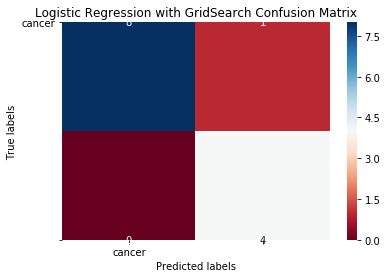

In [60]:
#Fitting Best Parameters

log_estimator = LogisticRegression(C = 0.001, penalty = 'l2', solver = 'newton-cg')

log_estimator.fit(X_train,y_train)

# Make predictions using the optimised parameters
y_pred_log = log_estimator.predict(X_test)

#Getting accuracy score and confusion matrix

ac_log=accuracy_score(y_test, y_pred_log)*100

print('Logistic Regression accuracy:',ac_log)

cm_log =  confusion_matrix(y_test, y_pred_log)

ax = plt.subplot()
sns.heatmap(cm_log, annot=True, ax = ax, fmt='g', cmap='RdBu') 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression with GridSearch Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

# Ridge Classifier with GridSearchCV

In [61]:
from sklearn.linear_model import RidgeClassifier

# Instantiate Ridge Classifier
ridge=RidgeClassifier()

#Hyper parameter tuning
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_classifier=GridSearchCV(ridge,parameters)
ridge_classifier.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
#Getting the best parameters
ridge_classifier.best_params_

{'alpha': 1e-15}

In [63]:
#Fitting and Predicting
ridge=RidgeClassifier(alpha = 1e-15)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)

Ridge Classifier accuracy: 92.3076923076923


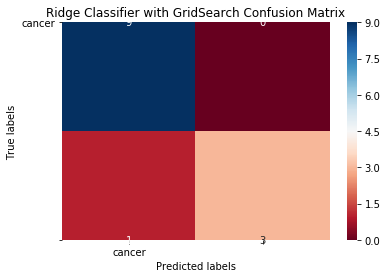

In [64]:
#Getting accuracy score and confusion matrix

ac_ridge=accuracy_score(y_test,y_pred_ridge)*100
print('Ridge Classifier accuracy:',ac_ridge)

cm_ridge=confusion_matrix(y_test,y_pred_ridge)
ax = plt.subplot()
sns.heatmap(cm_ridge, annot=True, ax = ax, fmt='g', cmap='RdBu') 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Ridge Classifier with GridSearch Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

# Comparing Accuracies

In [65]:
AccuracyDict={'K-means Clustering':ac_km,'K Nearest Neighbour':ac_knn,
              'Naive-Bayes Classifier':ac_nb,'Random Forest Classifier': ac_rf, 'SVM':ac_svm,'XGBoost':ac_xgb,
              'Logistic Regression':ac_log,'Ridge Classifier':ac_ridge
             }

In [66]:
print(AccuracyDict)

{'K-means Clustering': 76.92307692307693, 'K Nearest Neighbour': 100.0, 'Naive-Bayes Classifier': 69.23076923076923, 'Random Forest Classifier': 76.92307692307693, 'SVM': 92.3076923076923, 'XGBoost': 84.61538461538461, 'Logistic Regression': 92.3076923076923, 'Ridge Classifier': 92.3076923076923}


# Saving the model and testing

In [67]:
#save the model for later
#pickle file with .pkl extension is a binary file saved.

import joblib

joblib.dump(svclassifier, 'CancerTypeModel_SVM.pkl')
joblib.dump(log_estimator, 'CancerTypeModel_Logistic.pkl')
joblib.dump(ridge, 'CancerTypeModel_Logistic.pkl')

['CancerTypeModel_Logistic.pkl']

In [68]:
svm_model=joblib.load('CancerTypeModel_SVM.pkl')
ypred_test_svm=svm_model.predict(X_test)
ypred_test_svm

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [69]:
log_model=joblib.load('CancerTypeModel_Logistic.pkl')
ypred_test_log=log_model.predict(X_test)
ypred_test_log

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [70]:
ridge_model=joblib.load('CancerTypeModel_Logistic.pkl')
ypred_test_ridge=ridge_model.predict(X_test)
ypred_test_ridge

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [71]:
y_test

22    0
29    1
16    0
15    0
11    0
20    0
26    0
10    0
25    0
2     0
31    1
33    1
32    1
Name: cancer, dtype: int64

Acknowledgements
T.R. Golub, D.K. Slonim, P. Tamayo, C. Huard, M. Gaasenbeek, J.P. Mesirov, H. Coller, M. Loh, J.R. Downing, M.A. Caligiuri, C.D. Bloomfield, and E.S. Lander.Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression
Science 286:531-537. (1999). 
